<a href="https://colab.research.google.com/github/wolfinwallst/Machine_Learning_Deep_basis/blob/main/RL_Lab-05_Q_learning_on_non_deterministic_worlds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 RL

Lab-05

non-deterministic (`stochastic`) world에선,

앞선 강의의 Q-learning 을 통한 강화학습이 잘 작동하지 않으므로

$Q(s, a)$ 와 $[r + \gamma \max_{a'} Q(s', a')]$ 을 lr $\alpha$로 묶어준다:

$$Q(s, a) \leftarrow (1 - \alpha) Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a')]$$

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1')

Q = np.zeros([env.observation_space.n, env.action_space.n])

# lr은 빠른 학습을 위해 임의로 큰 값으로 설정_Q 값 업데이트에 사용됨
learning_rate = .85
dis = .99
num_episodes = 2000

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
rList=[]
for i in  range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        # 액션에 random noise 를 더해줌
        action = np.argmax(Q[state,  :] + np.random.randn(1, env.action_space.n)/(i+1))

        new_state, reward, done, _ = env.step(action)

        Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)

Score over time: 0.6875
Final Q-Table Values
[[7.48305908e-01 1.58412085e-02 1.99648938e-02 2.76200512e-02]
 [4.47010282e-03 2.03702285e-03 2.35441577e-03 7.93532019e-01]
 [8.76541605e-03 8.89154661e-03 2.71369573e-03 5.76389893e-01]
 [1.30725892e-03 1.29423163e-04 9.74512227e-04 4.00049900e-01]
 [9.01332123e-01 2.56668729e-03 1.30739130e-02 2.41322829e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.75075329e-02 1.02989068e-08 4.21074250e-05 4.12165659e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.13977361e-03 8.46738120e-04 8.82915964e-01]
 [0.00000000e+00 9.62208408e-01 2.03142570e-03 0.00000000e+00]
 [9.86030084e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.55907152e-01 0.00000000e+00]
 [0.00000000e+00 9.94740448e-01 0.00000000e+00 0.00000000e+00]
 [0.000000

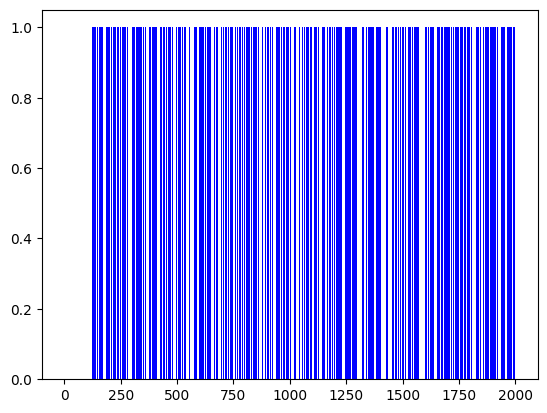

In [6]:
print("Score over time: " + str(sum(rList) / num_episodes))
print('Final Q-Table Values')
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()